In [15]:
import numpy as np
import torch 
import time
from torch import nn
from torchvision import datasets, transforms,utils
from PIL import Image
import matplotlib.pyplot as plt
import torch.optim as optim

# 预先定义图像归一化方式，归一化后取值在[-1.0，1.0]
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean=[0.5],std=[0.5])])

#加载数据
train_dataset = datasets.FashionMNIST(root='./data', 
                                            train=True, 
                                            transform=transform, 
                                            download=True)  #是否从网络下载
test_dataset = datasets.FashionMNIST(root='./data', 
                                            train=False, 
                                            transform=transform, 
                                            download=True)

In [16]:
#批量数128，随机乱序
batch_size = 128
shuffle = True
#采用小批量方式加载数据
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                            batch_size=batch_size, 
                                            shuffle=True, # 装载过程中随机乱序
                                            num_workers=1) 
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                            batch_size=batch_size, 
                                            shuffle=False,
                                            num_workers=1) 

In [17]:
# 定义模型网络结构超参数，输入28*28， 隐藏层256，输出层10
num_inputs = 28*28
num_hidens = 256
num_outputs = 10


#交叉熵损失函数，包含softmax
loss = nn.CrossEntropyLoss()
#使用Sequential类定义模型结构
net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(num_inputs, num_hidens),
    nn.Tanh(),
    nn.Linear(num_hidens, num_outputs)
)

for param in net.parameters():
    nn.init.normal_(param, mean=0, std=0.01)


In [18]:
def evaluate_acc(data_iter, net, loss):
    acc_count, n = 0, 0
    with torch.no_grad():
        loss_sum = 0
        for x, y in data_iter:
            y_hat = net(x)
            loss_sum += loss(y_hat, y)
            acc_count += acc(y_hat, y)
            n += y.size(0)
    return acc_count/n, loss_sum

def acc(y_hat, y):
    _, pre_labels = torch.max(y_hat, dim=1) # 将每个预测结果中最大输出的索引作为分类标签，pre_labels为小批量中每个样本预测结果的向量
    acc_count = (pre_labels == y).sum().item()
    return acc_count

In [19]:
#定义学习率
lr = 0.05
epoch = 10
opt = optim.SGD(net.parameters(), lr)

def train(net, train_iter, test_iter, num_epoch, opt, loss):
    train_acc_list, test_acc_list, train_loss_list, test_loss_list = [], [], [], []
    for epoch in range(num_epoch):
        train_acc_sum, train_loss_sum, n, =0, 0, 0
        for x, y in train_iter:
            opt.zero_grad()
            y_hat = net(x)
            l = loss(y_hat, y).sum()
            l.backward()
            opt.step()
            train_loss_sum += l.item()
            train_acc_sum += acc(y_hat, y)
            n += y.size(0)
        test_acc, test_loss = evaluate_acc(test_iter, net, loss)
        train_acc = train_acc_sum/n
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        train_loss_list.append(train_loss_sum)
        test_loss_list.append(test_loss)
        print(f"epoch: {epoch+1}, loss: {train_loss_sum:.4f}, train_acc: {train_acc:.4f}, test_acc: {test_acc:.4f}")   
    return  train_acc_list, test_acc_list, train_loss_list, test_loss_list
train_acc_list, test_acc_list, train_loss_list, test_loss_list = train(net, train_loader, test_loader, epoch, opt, loss)         

epoch: 1, loss: 345.2784, train_acc: 0.7563, test_acc: 0.7992
epoch: 2, loss: 224.3600, train_acc: 0.8306, test_acc: 0.8263
epoch: 3, loss: 205.6549, train_acc: 0.8441, test_acc: 0.8337
epoch: 4, loss: 193.8901, train_acc: 0.8523, test_acc: 0.8349
epoch: 5, loss: 184.9765, train_acc: 0.8598, test_acc: 0.8422
epoch: 6, loss: 178.8015, train_acc: 0.8646, test_acc: 0.8389
epoch: 7, loss: 172.8892, train_acc: 0.8683, test_acc: 0.8555
epoch: 8, loss: 167.4672, train_acc: 0.8729, test_acc: 0.8501
epoch: 9, loss: 163.8052, train_acc: 0.8755, test_acc: 0.8618
epoch: 10, loss: 159.0927, train_acc: 0.8783, test_acc: 0.8615


C:\Users\chen\AppData\Local\Temp\ipykernel_22248\1635507130.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


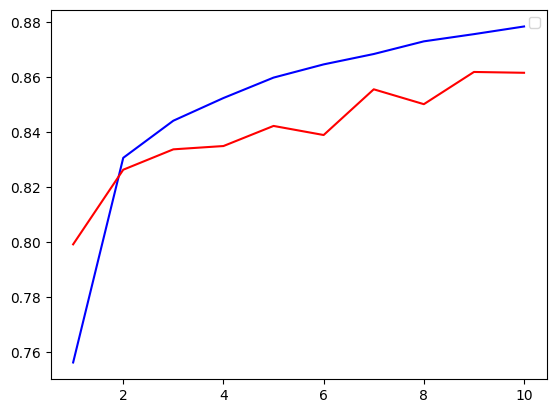

In [21]:
x = list(range(1,len(train_acc_list)+1))
plt.plot(x, train_acc_list, color="b")
plt.plot(x, test_acc_list, color="r")
plt.legend()
plt.show()

C:\Users\chen\AppData\Local\Temp\ipykernel_22248\1635507130.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


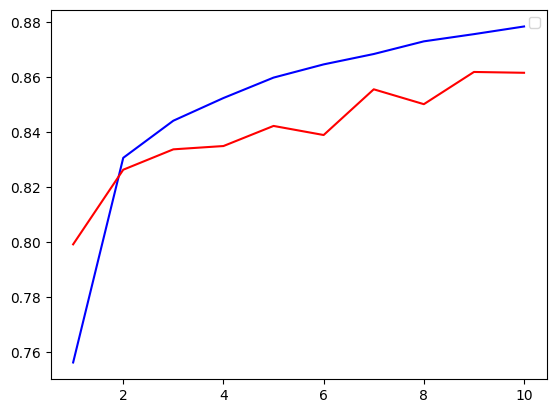

In [20]:
x = list(range(1,len(train_acc_list)+1))
plt.plot(x, train_acc_list, color="b")
plt.plot(x, test_acc_list, color="r")
plt.legend()
plt.show()